In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=12) # для увеличения шрифта подписей графиков

Matplotlib is building the font cache; this may take a moment.


In [5]:
houses = pd.read_csv('1_4_houses.csv')
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


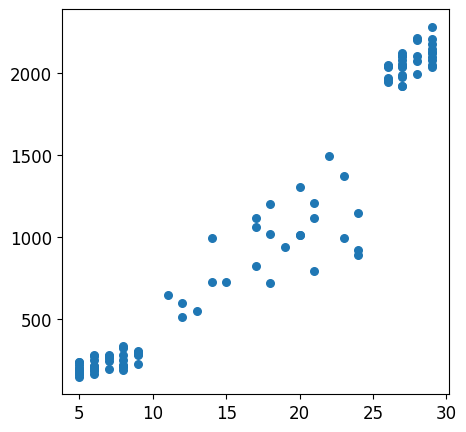

In [6]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.scatter(houses['dim_1'],houses['price'],s=30)

plt.show()

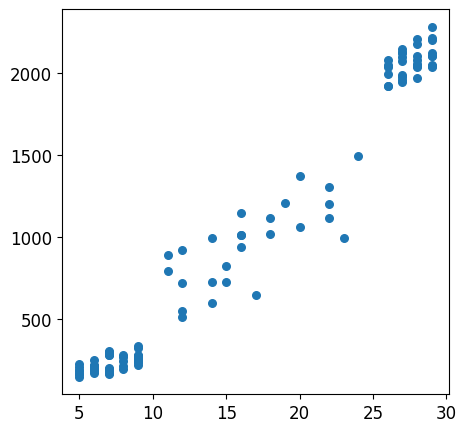

In [7]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()

ax.scatter(houses['dim_2'],houses['price'],s=30)

plt.show()

In [9]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

price = price(dim_1) = b * dim_1 + a 

In [11]:
houses[['dim_1']]

,dim_1
0,29
1,28
2,6
3,5
4,6
...,...
95,27
96,29
97,24
98,21


In [16]:
# выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1"]]
y = houses["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [17]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1):
    return a + b * dim_1

In [14]:
reg.coef_, reg.intercept_

(array([83.08870109]), np.float64(-351.68469784672357))

In [18]:
reg_prediction(X.dim_1[0])

np.float64(2057.887633711507)

In [19]:
reg_prediction(X.dim_1[1])

np.float64(1974.7989326232926)

In [20]:
X.dim_1

0     29
1     28
2      6
3      5
4      6
      ..
95    27
96    29
97    24
98    21
99    29
Name: dim_1, Length: 100, dtype: int64

In [24]:
X[0:1]

,dim_1
0,29


In [25]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

np.float64(2057.887633711507)

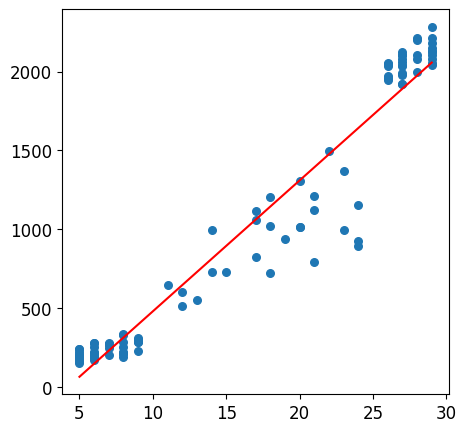

In [26]:
fig = plt.figure(figsize=(5, 5)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["price"], s=30)
# помещаем предсказания
ax.plot([X.dim_1.min(), X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c="red")

# отображаем картинку
plt.show()

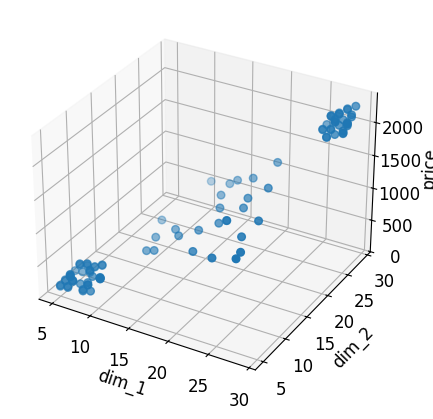

In [28]:
fig = plt.figure(figsize=(5, 5)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=30)

# называем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

# отображаем картинку
plt.show()

In [29]:
# выгружаем признаки и целевые значения в отдельные переменные
X = houses[["dim_1", "dim_2"]]
y = houses["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

price = price(dim_1, dim_2) = a + b1 * dim_1 + b2 * dim_2

In [30]:
# вытаскиваем нужные коэффициенты
[b1, b2] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

In [32]:
reg.coef_, reg.intercept_

(array([34.38095466, 53.54529546]), np.float64(-415.49236636492196))

In [33]:
reg_prediction(X.dim_1[0],X.dim_2[0])

np.float64(2080.82359179565)

In [34]:
# используем встроенные методы для расчета предсказаний
reg.predict(X[0:1])[0]

np.float64(2080.8235917956504)

In [35]:
X[0:1]

,dim_1,dim_2
0,29,28


In [36]:
d1,d2 = list(),list()
for x in np.linspace(min(houses["dim_1"]), max(houses["dim_1"]), 100):
    for y in np.linspace(min(houses["dim_2"]), max(houses["dim_2"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

/Users/mikhail/anaconda3/envs/py313/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
d2

array([[ 5.        ],
       [ 5.24242424],
       [ 5.48484848],
       ...,
       [28.51515152],
       [28.75757576],
       [29.        ]], shape=(10000, 1))

In [36]:
d1

array([[ 5.],
       [ 5.],
       [ 5.],
       ...,
       [29.],
       [29.],
       [29.]])

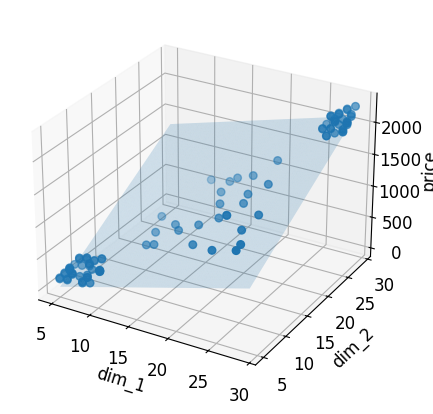

In [38]:
fig = plt.figure(figsize=(5, 5)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=30)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()